# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
df = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.

df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


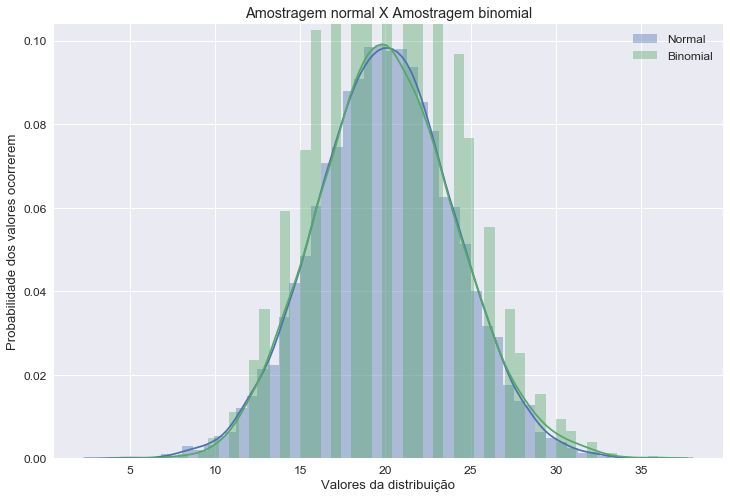

In [17]:
sns.set(font_scale = 1.2)
sns.distplot(df['normal'], label="Normal")
sns.distplot(df['binomial'], label="Binomial")
plt.xlabel('Valores da distribuição')
plt.ylabel('Probabilidade dos valores ocorrerem')
plt.title('Amostragem normal X Amostragem binomial')
plt.legend();

In [18]:
df_desc = df.describe()
df_desc

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


In [19]:
q1_norm = df_desc['normal'].loc['25%']
q1_norm

17.30963787997159

In [20]:
q1_binom = df_desc['binomial'].loc['25%']
q1_binom

17.0

In [21]:
q2_norm = df_desc['normal'].loc['50%']
q2_norm

19.98962009682849

In [22]:
q2_binom = df_desc['binomial'].loc['50%']
q2_binom

20.0

In [23]:
q3_norm = df_desc['normal'].loc['75%']
q3_norm

22.68432355145866

In [24]:
q3_binom = df_desc['binomial'].loc['75%']
q3_binom

23.0

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [25]:
def q1():
    # Retorne aqui o resultado da questão 1.
    df_desc['diferenca'] = df_desc['normal']-df_desc['binomial']
    return (round(df_desc['diferenca'].loc['25%'],3),
            round(df_desc['diferenca'].loc['50%'],3),
            round(df_desc['diferenca'].loc['75%'],3))

In [108]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?


-As magnitudes são pequenas devido a similaridade da distribuição binomial com a curva normal para valores elevados de n e que p(sucessos) não esteja tão perto de 0 ou 1.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

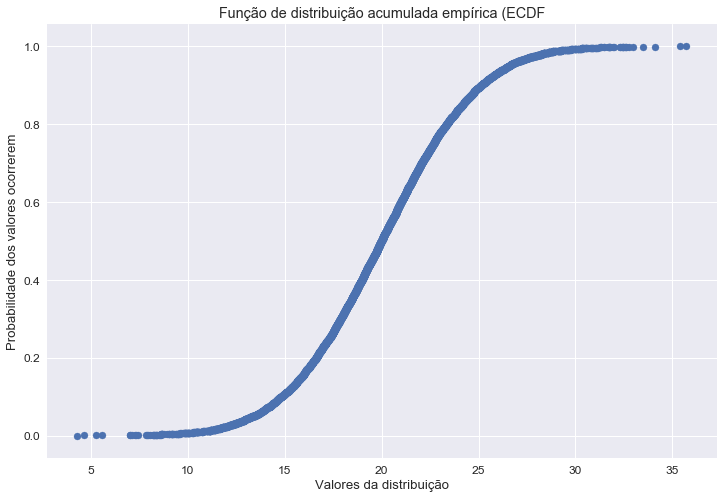

In [27]:
#Plotando o  ECDF dos dados da variável normal:
ecdf = ECDF(df['normal'])
plt.title('Função de distribuição acumulada empírica (ECDF')
plt.xlabel('Valores da distribuição')
plt.ylabel('Probabilidade dos valores ocorrerem')
plt.scatter(ecdf.x, ecdf.y);

In [109]:
def q2():
    # Retorne aqui o resultado da questão 2.
    norm_ecdf = ECDF(df['normal']) #instancia a distribuição acumalada empírica
    norm_mean = df.mean() 
    norm_mean = df.mean()
    norm_std = df.normal.std()

    ecdf = norm_ecdf(norm_mean + norm_std) - norm_ecdf(norm_mean - norm_std) #diferença entre a media + std e media - std
    
    cdf = round(ecdf[0],3)
    return cdf

In [110]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
  
  Sim o valor teórico é de 0.683, devido a distribuição ser próxima de uma distribuição normal
  
  
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [111]:
def q21():
    norm_ecdf = ECDF(df['normal']) #instancia a distribuição acumalada empírica
    norm_mean = df.mean() 
    norm_mean = df.mean()
    norm_std = df.normal.std()

    ecdf = norm_ecdf(norm_mean + 2*norm_std) - norm_ecdf(norm_mean - 2*norm_std) #diferença entre a media + std e media - std
    
    cdf = round(ecdf[0],3)
    return cdf

In [112]:
q21()

0.954

In [113]:
def q22():
    norm_ecdf = ECDF(df['normal']) #instancia a distribuição acumalada empírica
    norm_mean = df.mean() 
    norm_mean = df.mean()
    norm_std = df.normal.std()

    ecdf = norm_ecdf(norm_mean + 3*norm_std) - norm_ecdf(norm_mean - 3*norm_std) #diferença entre a media + std e media - std
    
    cdf = round(ecdf[0],3)
    return cdf

In [114]:
q22()

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [115]:
def q3():
    m_norm  = df['normal'].mean()
    v_norm  = df['normal'].var()
    m_binom = df['binomial'].mean()
    v_binom = df['binomial'].var()
    return (round(m_binom - m_norm, 3), round(v_binom - v_norm, 3))

In [116]:
q3()

(0.106, 0.22)

In [26]:
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(1000, 0.2, size=10000)})

In [27]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.983095,199.930300
std,3.964038,12.596226
min,4.574499,151.000000
25%,17.238209,191.000000
50%,19.990710,200.000000
75%,22.693723,208.000000
max,35.769324,251.000000


C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


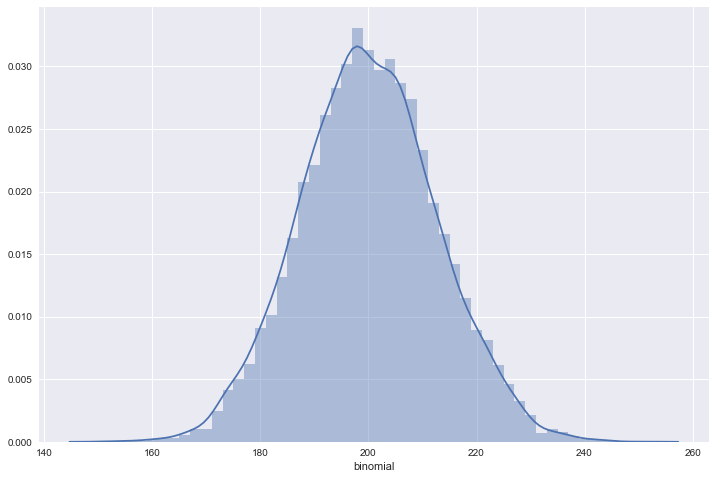

In [28]:
sns.distplot(dataframe['binomial'])
plt.show()

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

Aumentar o valor de n faz com que a distribuição binomial se assemelhe a distribuição normal

## Parte 2

### _Setup_ da parte 2

In [4]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

In [5]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Inicie sua análise da parte 2 a partir daqui

In [6]:
# Sua análise da parte 2 começa aqui.
stars['target'] = stars['target'].apply(lambda x: 0 if (x == False) else 1)
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


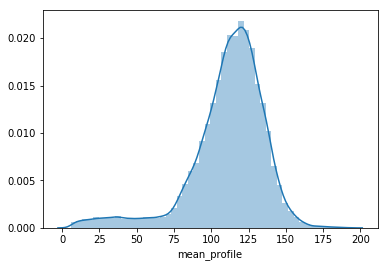

In [7]:
sns.distplot(stars['mean_profile']);

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [8]:
def q4():
    target_0 = stars.query('target==0')['mean_profile']
    
    padronizado = (target_0 - target_0.mean())/target_0.std()
    
    quantis = sct.norm.ppf([0.8, 0.9, 0.95])
    
    ecdf_padro = ECDF(padronizado)
    
    prob = ecdf_padro(quantis).round(3)
    
    return (prob[0],prob[1],prob[2])

In [9]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?

Sim, uma vez que os valores estão padronizados entre 0 e 1, portanto o percentil 0.806 representa que 80% dos dados estão antes deles e assim para todos os outros


* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Que ela tem características que se assemelham a uma distriuição normal

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


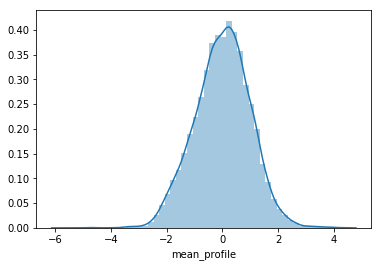

In [10]:
 target_0 = stars.query('target==0')['mean_profile']
false_pulsar_mean_profile_standardized = (target_0 - target_0.mean())/target_0.std()
sns.distplot(false_pulsar_mean_profile_standardized);

In [11]:
def q5():
    # Retorne aqui o resultado da questão 5.
    target_0 = stars.query('target==0')['mean_profile']
    false_pulsar_mean_profile_standardized = (target_0 - target_0.mean())/target_0.std()
    return (round(np.percentile(false_pulsar_mean_profile_standardized,25) - sct.norm.ppf(0.25, loc=0, scale=1),3),
                 round(np.percentile(false_pulsar_mean_profile_standardized,50) - sct.norm.ppf(0.50, loc=0, scale=1),3),
                 round(np.percentile(false_pulsar_mean_profile_standardized,75) - sct.norm.ppf(0.75, loc=0, scale=1),3))

In [12]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

